In [2]:
!pip install colorama

In [3]:
import numpy as np # linear algebar
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Suppress warnings
warnings.filterwarnings('ignore')

np.random.seed(7)

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only '../input/' directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

DRIVE_PATH = './drive/MyDrive/kaggleTimeSeries/'
for dirname, _, filenames in os.walk('./drive/MyDrive/kaggleTimeSeries/'):
  for filename in filenames:
    print(os.path.join(dirname, filename))
    pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using 'Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./drive/MyDrive/kaggleTimeSeries/datasets_description.xlsx
./drive/MyDrive/kaggleTimeSeries/Aquifer_Luco.csv
./drive/MyDrive/kaggleTimeSeries/Lake_Bilancino.csv
./drive/MyDrive/kaggleTimeSeries/Water_Spring_Amiata.csv
./drive/MyDrive/kaggleTimeSeries/Aquifer_Doganella.csv
./drive/MyDrive/kaggleTimeSeries/Aquifer_Auser.csv
./drive/MyDrive/kaggleTimeSeries/Water_Spring_Lupa.csv
./drive/MyDrive/kaggleTimeSeries/River_Arno.csv
./drive/MyDrive/kaggleTimeSeries/Aquifer_Petrignano.csv
./drive/MyDrive/kaggleTimeSeries/Water_Spring_Madonna_di_Canneto.csv
./drive/MyDrive/kaggleTimeSeries/datasets_description.ods
./drive/MyDrive/kaggleTimeSeries/MyStudy/README.md
./drive/MyDrive/kaggleTimeSeries/MyStudy/.git/description
./drive/MyDrive/kaggleTimeSeries/MyStudy/.git/packed-refs
./drive/MyDrive/kaggleTimeSeries/MyStudy/.git/config
./drive/MyDrive/kaggleTimeSeries/MyStudy/.git/FETCH_HEAD
./drive/MyDrive/kaggleTimeSeries/MyStudy/.git/ORIG_HEAD
./drive/MyDrive/kaggleTimeSeries/MyStudy/.git/HEAD
./driv

<iframe src="https://www.kaggle.com/embed/andreshg/timeseries-analysis-a-complete-guide?cellIds=3&kernelSessionId=55927590" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="TimeSeries Analysis 📈A Complete Guide 📚"></iframe>

<iframe src="https://www.kaggle.com/embed/andreshg/timeseries-analysis-a-complete-guide?cellIds=4&kernelSessionId=55927590" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="TimeSeries Analysis 📈A Complete Guide 📚"></iframe>

In this project I want to deep dive into TimeSeries analysis to show how to review the data, how to preview it and how to engineering.

I also want to explore some of the typical TimeSeries topics such as:
- ACF/PACF
- ARIMA
- Auto-ARIMA
- Prophet
- Augmented Dickey-Fuller (ADF)

<iframe src="https://www.kaggle.com/embed/andreshg/timeseries-analysis-a-complete-guide?cellIds=5&kernelSessionId=55927590" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="TimeSeries Analysis 📈A Complete Guide 📚"></iframe>

- 1. Data Visualization
- 2. Data Preprocessing
  - 2.1 Handle Missings
  - 2.2 Smoothing data / Resampling
  - 2.3 Stationarity
    - 2.3.1 Augmented Dickey-Fuller (ADF)
    - 2.3.2 Transforming
    - 2.3.3 Differencing

- 3. Feature engineering
  - 3.1 Encoding Cyclical Features
  - 3.2 TimeSeries Decomposition
  - 3.3 Lag

- 4. Exploratory Data Analysis
  - 4.1 Autocorrelation Analysis

- 5. Modeling
  - 5.1 Models for Univariate Time Series
    - 5.1.1 Univariate Prophet
    - 5.1.2 ARIMA
    - 5.1.3 Auto-ARIMA
    - 5.1.4 LSTM
  - 5.2 Models for Multivariate Time Series
    - 5.1.1 Multivariate Prophet

- 6. Conclusions
- 7. References

In [5]:
df = pd.read_csv(DRIVE_PATH + 'Aquifer_Petrignano.csv')
# df = pd.read_csv('/content/drive/MyDrive/kaggleTimeSeries/Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [6]:
# Remove old rows
df = df[df['Rainfall_Bastia_Umbra'].notna()].reset_index(drop=True)
# Remove not useful columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)

In [7]:
df.head()
df.columns = ['date', 'rainsdafsdffall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']
df.head()

,date,rainsdafsdffall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [8]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [9]:
features

['date', 'rainfall', 'temperature', 'drainage_volume', 'river_hydrometry']

Since this is a TimeSeries problem, we have to parse 'date' column

In [10]:
dicta = {'backgroundcolor' : 'dogerblue'}

def test(backgroundcolor):
  print(backgroundcolor)
  pass

test(**dicta)

dogerblue


In [11]:
from datetime import datetime, date

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color' : 'dodgerblue'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


# Data visualization

Features:
- **Rainfall** indicates the quantity of rain falling (mm)
- **Temperature** indicates the temperature (C)
- **Volume** indicates the volume of water taken from the drinking water treatment plant (m^3)
- **Hydrmety** indicates the groundwater level (m)

Target:
- **Depth to Groundwater** indicates the groundwater level (m from the ground floor)

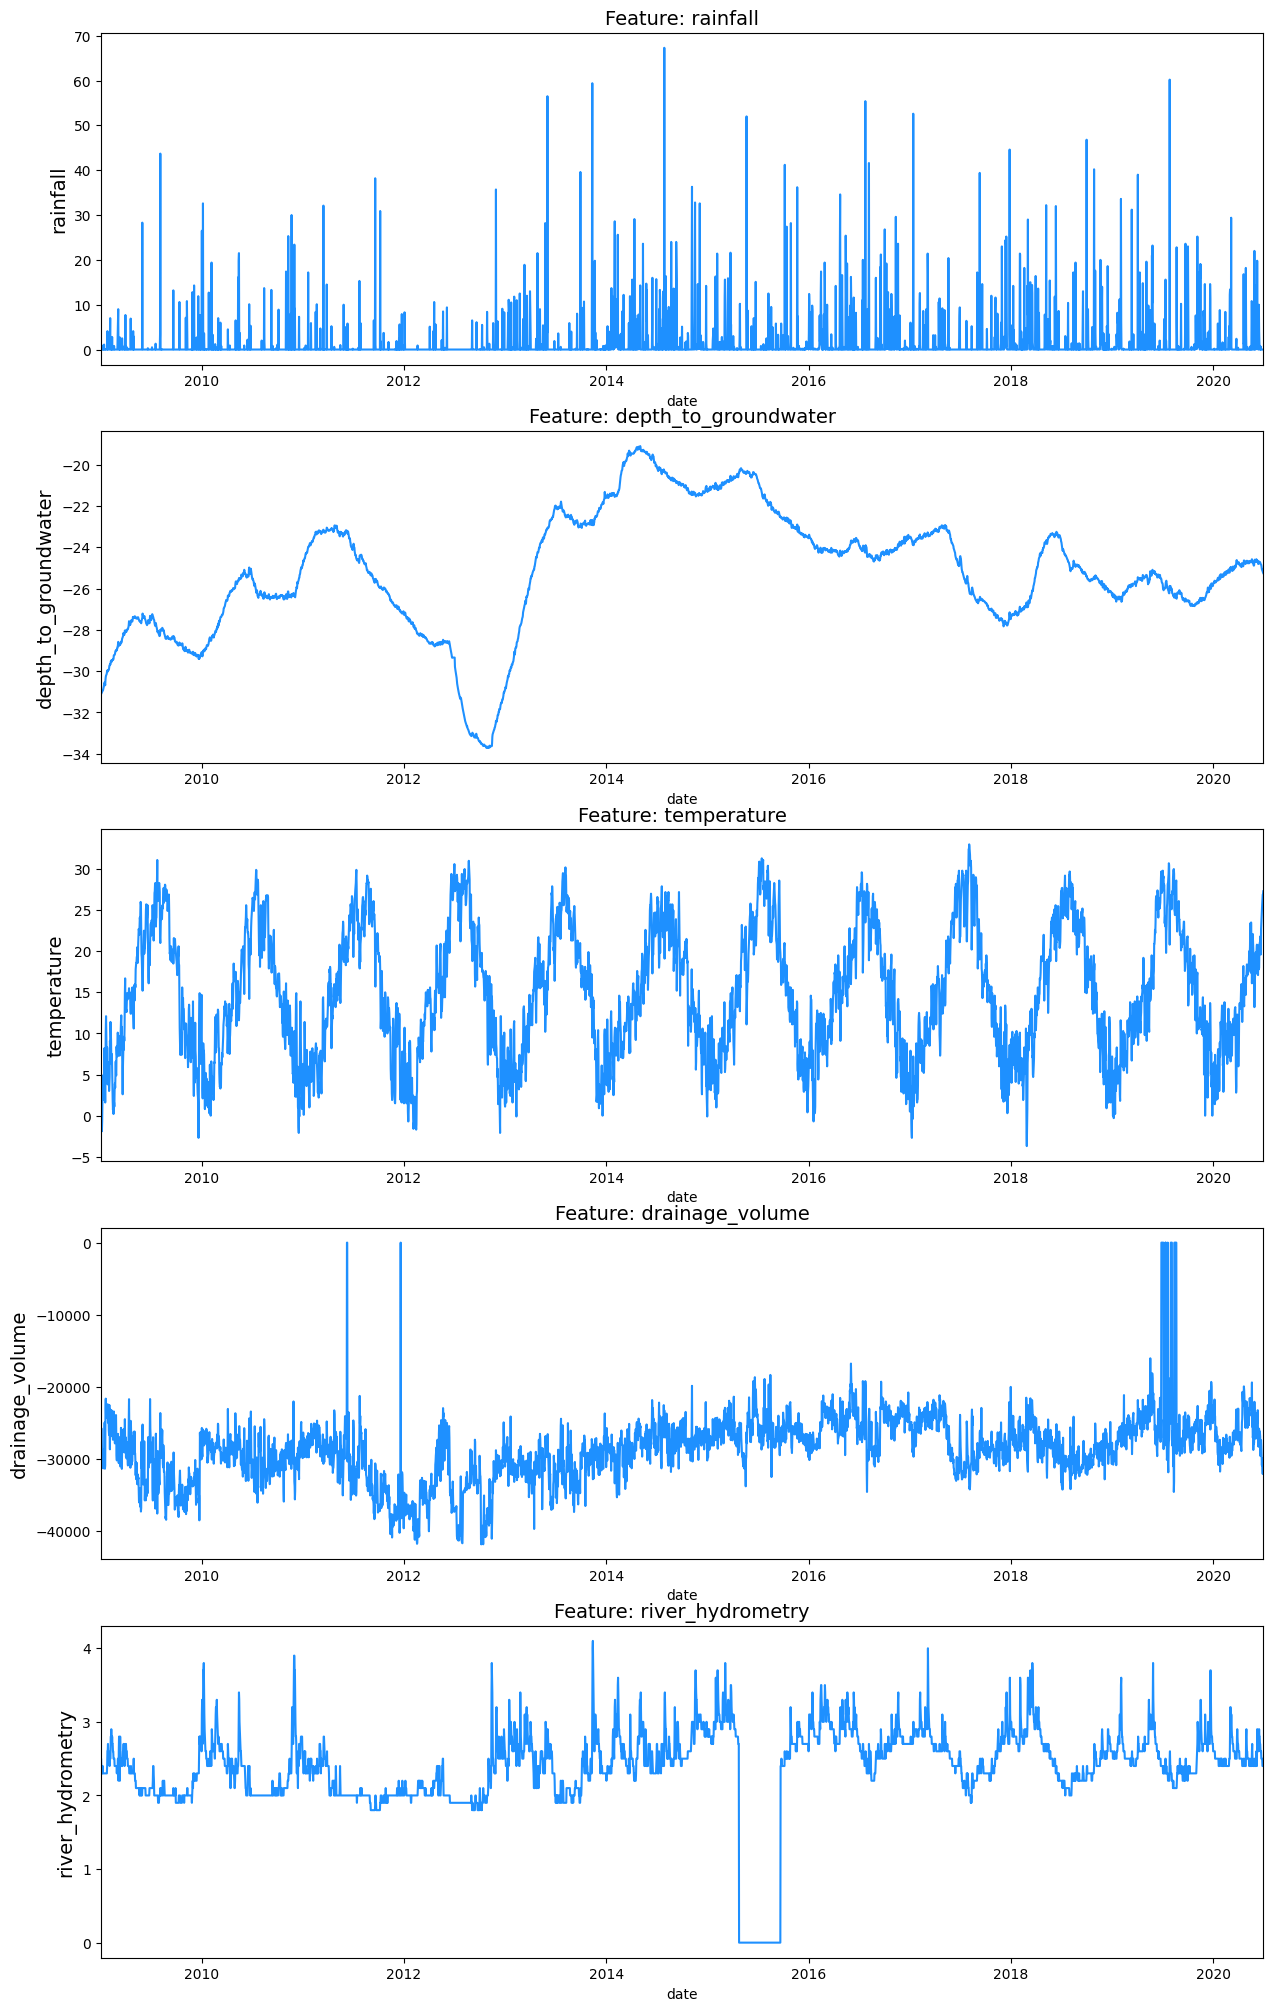

In [12]:
# To complete the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis = 1).columns):
  sns.lineplot(x=df['date'], y = df[column].fillna(method='ffill'), ax = ax[i], color='dodgerblue')
  ax[i].set_title('Feature: {}'.format(column), fontsize=14)
  ax[i].set_ylabel(ylabel=column, fontsize = 14)
  ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Data Preprocessing

### Chronological Order and Equidistant Timestamps
The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidistant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

But, first of all, lets see how to check if our dataset is correctly formated!

In [13]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)
df[['date', 'delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [14]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step

## 2.1 Handle Missings

As we can see, the dataset has some null values.

Furthermore, plotting the time series reveals that there seem to be **some zero values that seems to be nulls** for `drainage_volume`, and `river_hydrometry`. We will have to claen them by replacing them by nan values and filling them afterwards.

In [15]:
# df = df.drop('delta', axis=1)
df.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
delta                    1
dtype: int64

(14245.0, 18443.0)

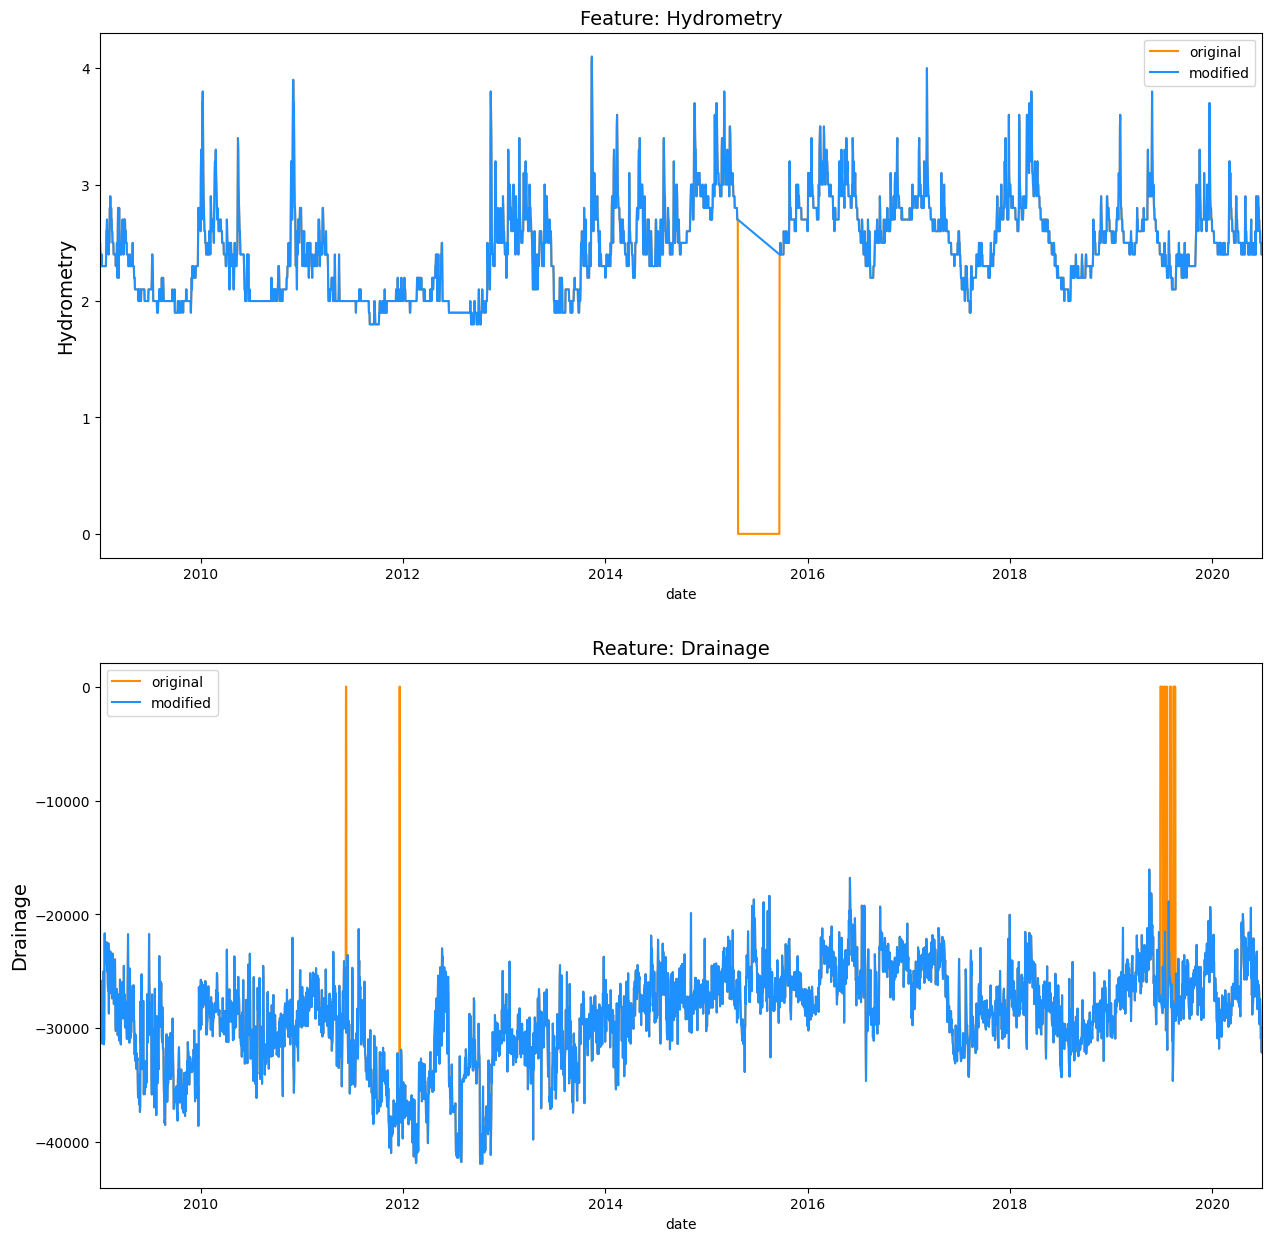

In [16]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize = (15, 15))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y = df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Reature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])


So now we have to fix missing values. Lets take a llok of these cases and explore what can we do with them.

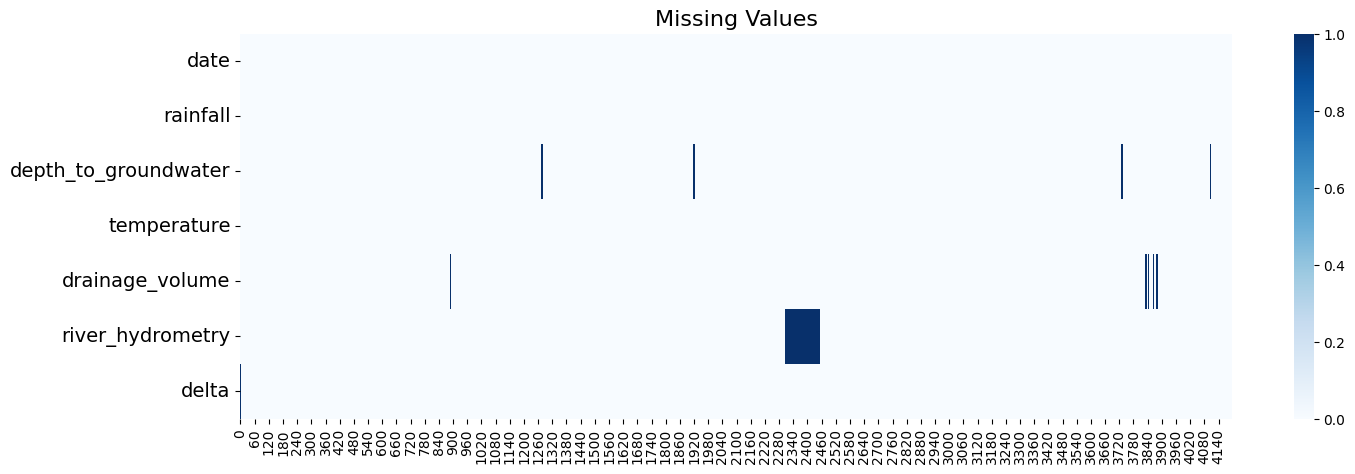

In [17]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)
plt.show()

### Missing Values, how to handle
- **Option 1:Fill NaN Outlier or Zero**
In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

- **Option 2:Fill NaN with Mean Value**
Filling NaNs with the mean value is also not sufficient and naive,and doesn't seems to be a good option.

- **Option 3: Fill NaN with Last Value with .ffill()**
Filling NaNs with the last value could be bit better.

- **Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()**
Filling NaNs with the interpolated values is the best option in this small example but it requires knowledge of the neighboring value.



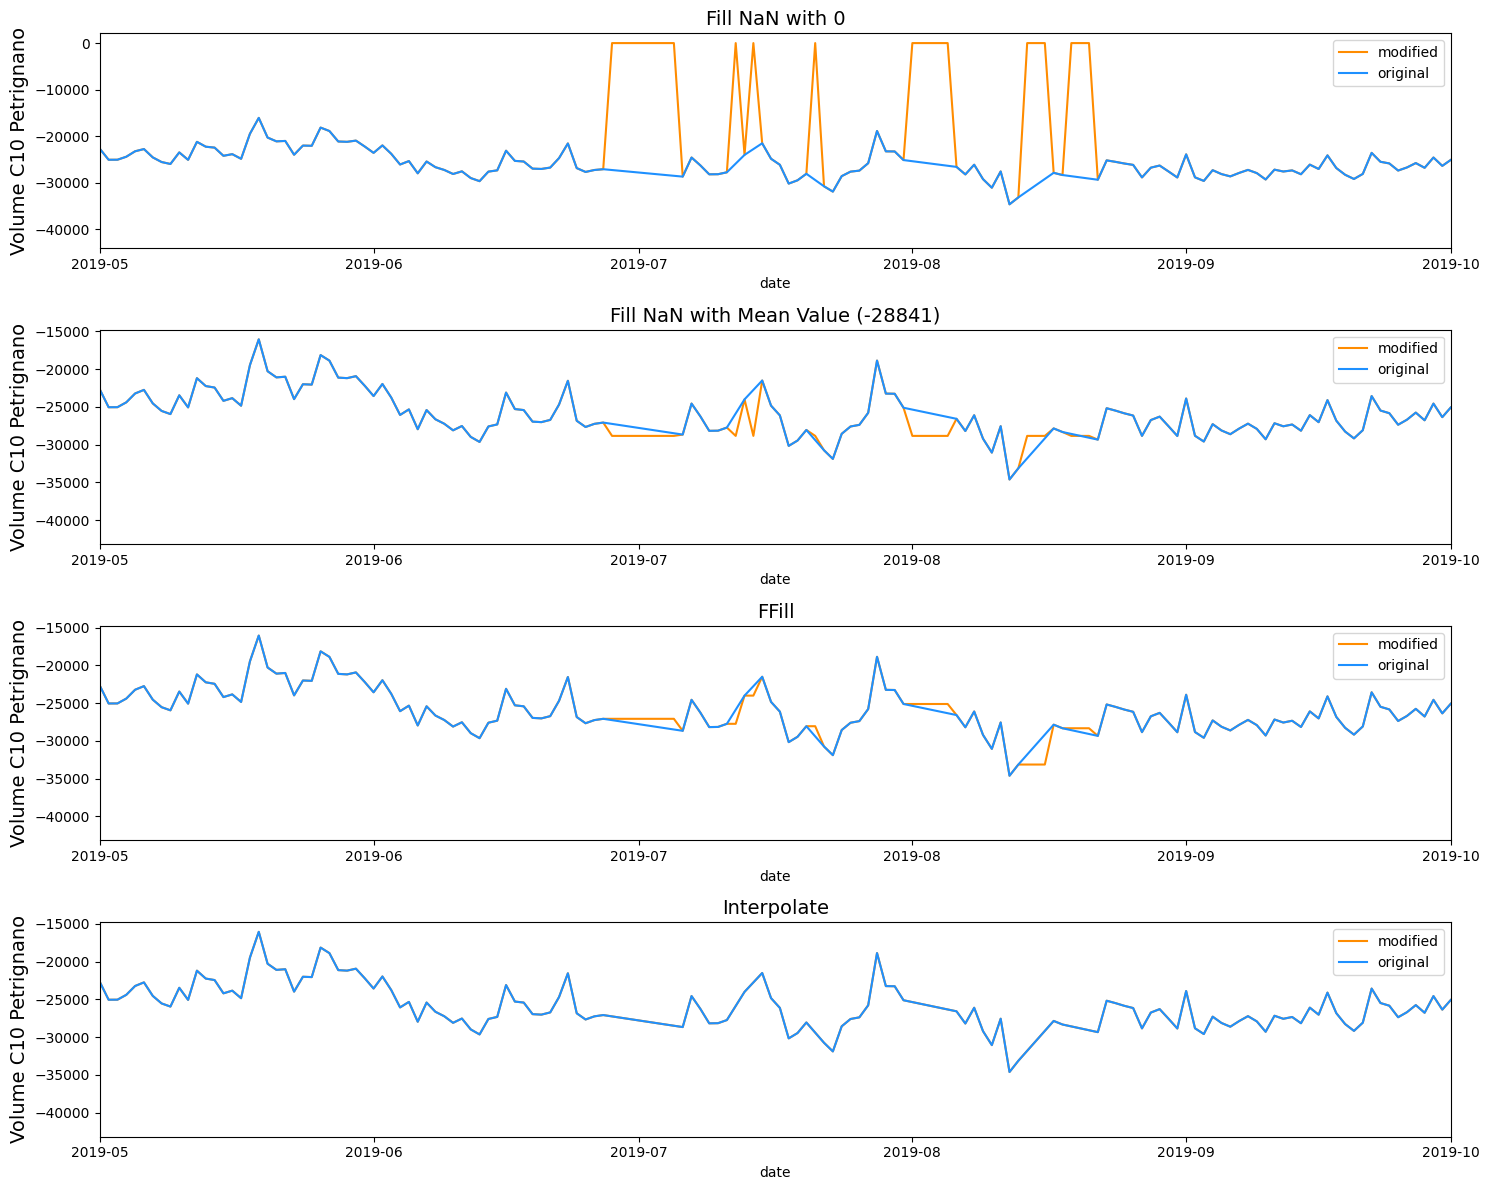

In [18]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label='modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize = 14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label='modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label='original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
plt.show()


As we can see, the best option in this case, **seems to best option!**   
So, lets interpolate missing values

In [19]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

## 2.2 Smoothing data / Resampling

Resampling can provide additional information on the data. There are two types of resampling:
- **Upsampling** is when the frequency of samples is increased (e.g. days to hours)
- **Downsampling** is when the frequency of samples is decreased (e.g. days to weeks)

In this example, we will do some downsampling with the .resample() function (simiar to groupby and aggregate as mean)

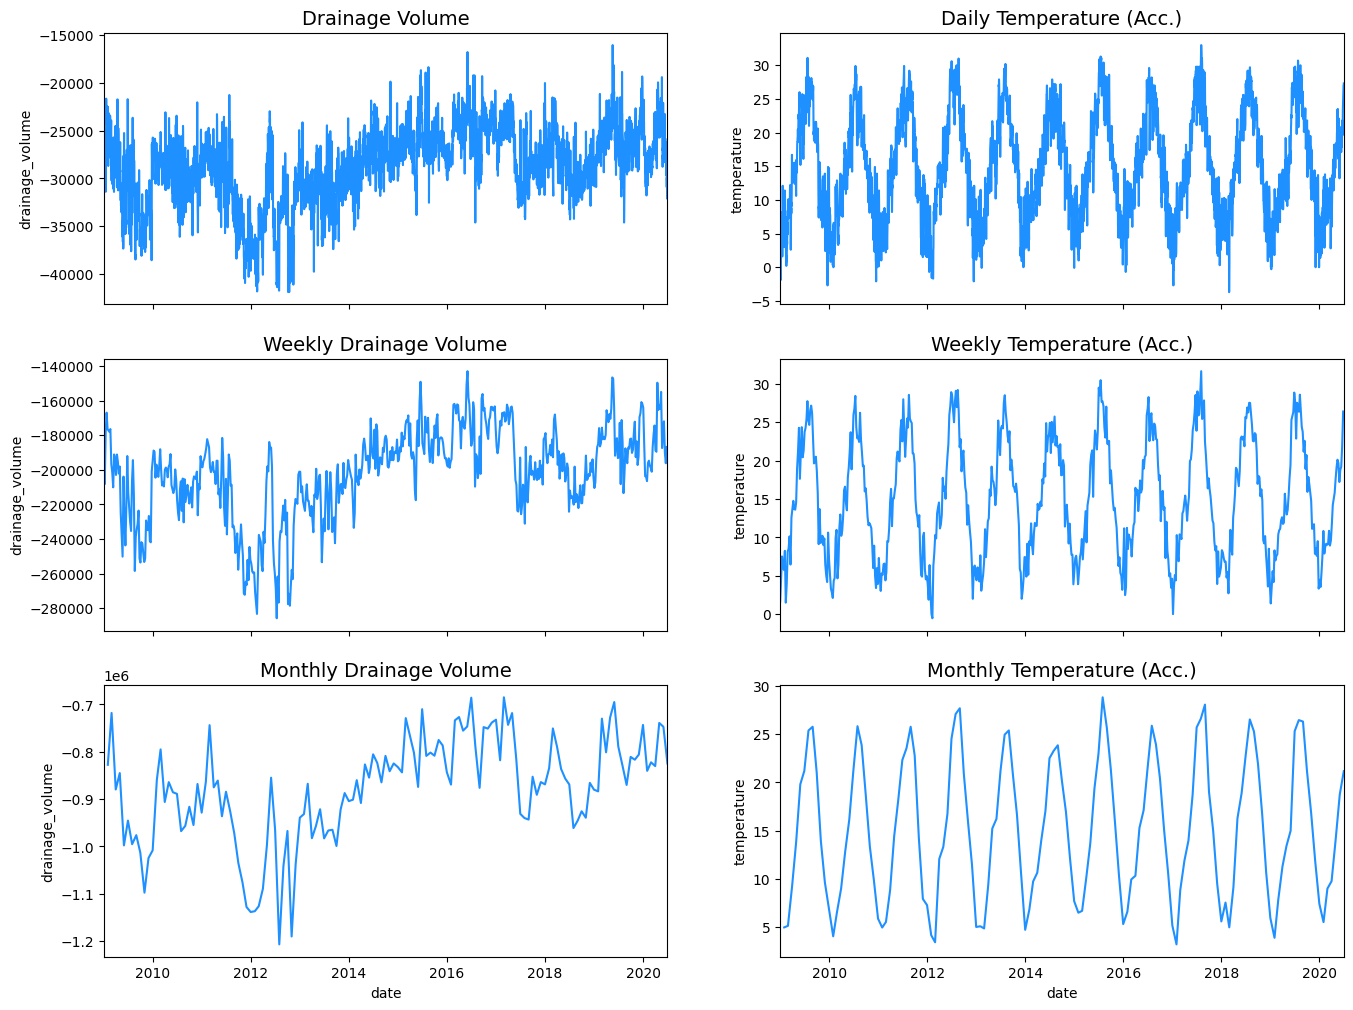

In [20]:
fig, ax = plt.subplots(ncols = 2, nrows=3, sharex=True, figsize=(16, 12))

sns.lineplot(x= df['date'], y = df['drainage_volume'], color='dodgerblue', ax=ax[0,0])
ax[0,0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date', 'drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y = resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1,0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date', 'drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y = resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2,0])
ax[2,0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
  ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x = df['date'], y = df['temperature'], color='dodgerblue', ax=ax[0,1])
ax[0,1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date', 'temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y = resampled_df['temperature'], color='dodgerblue', ax=ax[1,1])
ax[1,1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date', 'temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y = resampled_df['temperature'], color='dodgerblue', ax=ax[2,1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
  ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [21]:
# As we can see, downsample to weekly could smooth the data and help with analysis
downsample = df[['date', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry', 'rainfall']].resample('7D', on='date').mean().reset_index(drop=False)
df = downsample.copy()

## 2.3 Stationarity

Some time-series models, such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

- constant mean and mean is not time-dependent
- constant variance and variance is not time-dependent
- constant covariance and covariance is not time-dependent




The check for stationarity can be done via three diffrent approaches:
1. **visually**: plot time series and check for trends or seasonality
2. **basic statistics**: split time series and compare the mean and variance of each partition
3. **statistical test**: Augmented Dickey Fuller test

In [22]:
df['drainage_volume']

0     -28164.918857
1     -29755.789714
2     -25463.190857
3     -23854.422857
4     -25210.532571
           ...     
595   -25591.062857
596   -24567.099429
597   -27178.416000
598   -28030.134857
599   -31131.504000
Name: drainage_volume, Length: 600, dtype: float64

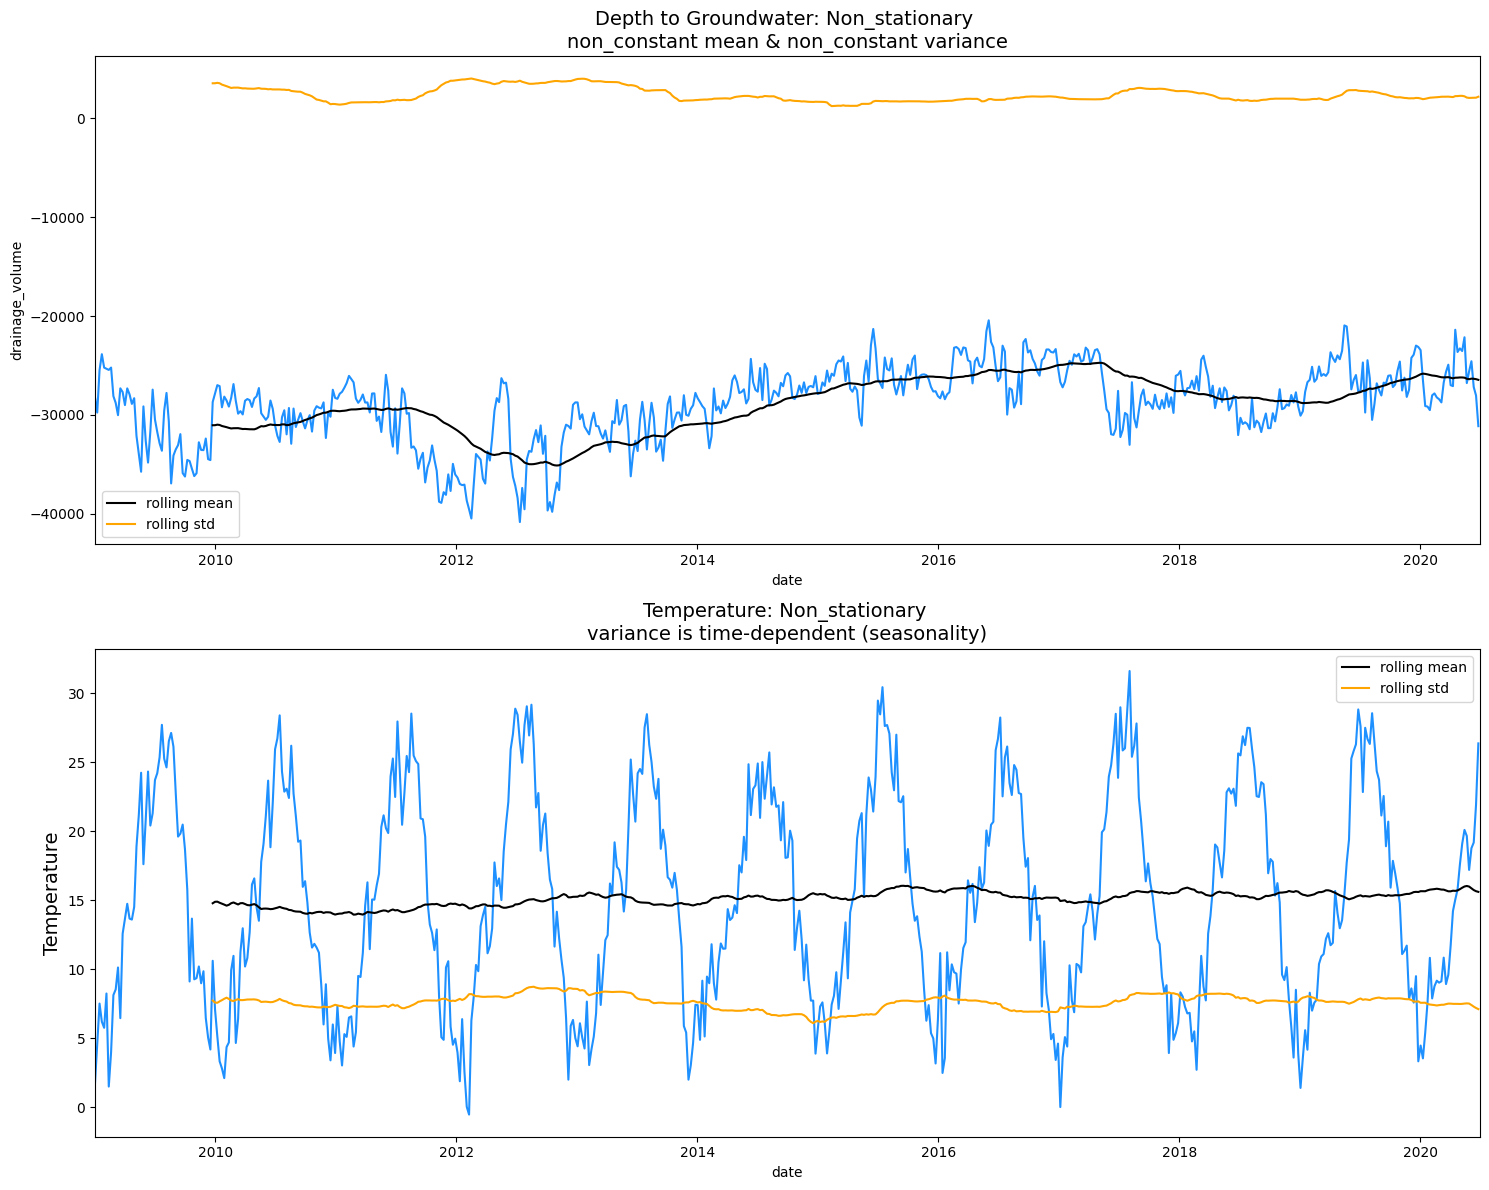

In [23]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non_stationary \nnon_constant mean & non_constant variance', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non_stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In this **visual check**, we can see that the **features don't have constant mean and std**, but they are close to it.

### Unit Root Test
Unit root is a characteristic of a time series that makes it non-stationary. And ADF test belong to the unit root test.
Technically, a unit root is said to exist in a time series of value of alpha = 1 in below equation.

$Y_t = 	\alpha Y_{t-1} + 	\beta X_{e} + \epsilon $

where Yt is value of the time series at time 't' and Xe is an exogenous variable.

**The presence of a unit root means the time series is non-stationary.**

### 2.3.1 Augmented Dickey-Fuller (ADF)

**Augmented Dickey-Fuller (ADF)** test is a type of statistical test called unit root test. Unit roots are a cause for non_stationarity.

- **Null Hypothesis (H0)**: Time series has a unit root. (Time series is not stationary)
- **Alternate Hypothesis (H1)**: Time series has no unit root (Time series is Stationary)

**If the null hypothesis can be rejected, we can conclude that the time series is stationary.**

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The default significance level is 5%

- <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
- <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>

On the ohter hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
- <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red>non-stationary</font>
- <font color='green'>**ADF statistic < critical value**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>

In [25]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html # adfuller > adf 테스트
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['depth_to_groundwater'].values)
result

(-2.8802016493166605,
 0.047699190920208856,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877616)

Now, we are going to check for each variable:
- The p-value is less than 0.05
- Check the range of the ADF statistic compared with critical_values

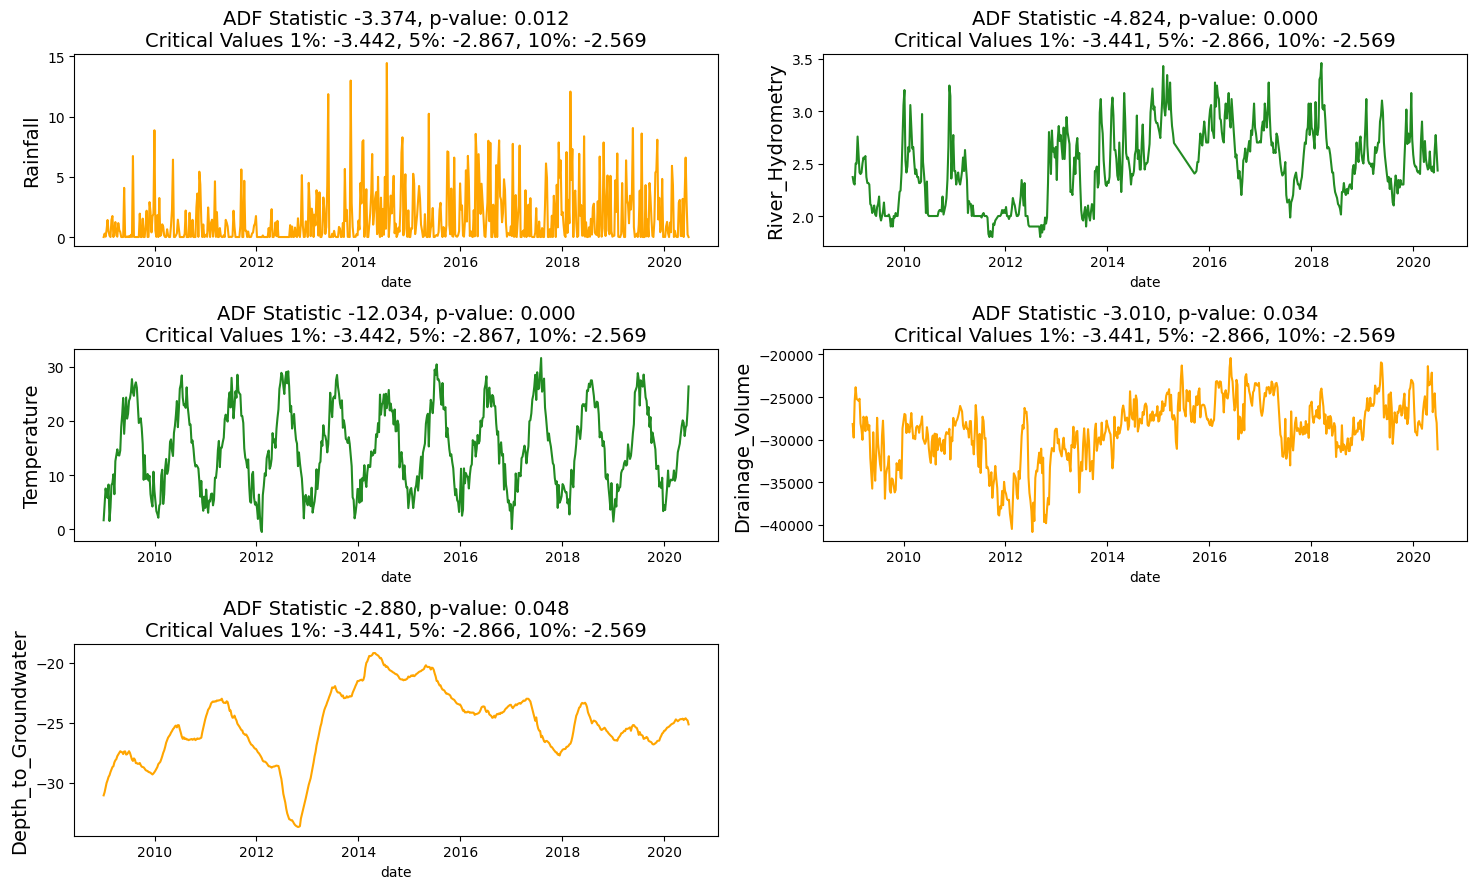

In [26]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,9))

def visualize_adfuller_results(series, title, ax):
  result = adfuller(series)
  significance_level = 0.05
  adf_stat = result[0]
  p_val = result[1]

  crit_val_1 = result[4]['1%']
  crit_val_5 = result[4]['5%']
  crit_val_10 = result[4]['10%']

  if(p_val < significance_level) & (adf_stat < crit_val_1):
    linecolor = 'forestgreen'
  elif(p_val < significance_level) & (adf_stat < crit_val_5):
    linecolor = 'orange'
  elif(p_val < significance_level) & (adf_stat < crit_val_10):
    linecolor = 'red'
  else:
    linecolor = 'purple'

  sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
  ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
  ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2,1])
plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model such as ARMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:
- **Transformation**: e.g. log or square root to stablilize non-constant variance.
- **Differencing**: subtracts the current value from the previous.

### 2.3.2 Transforming

<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

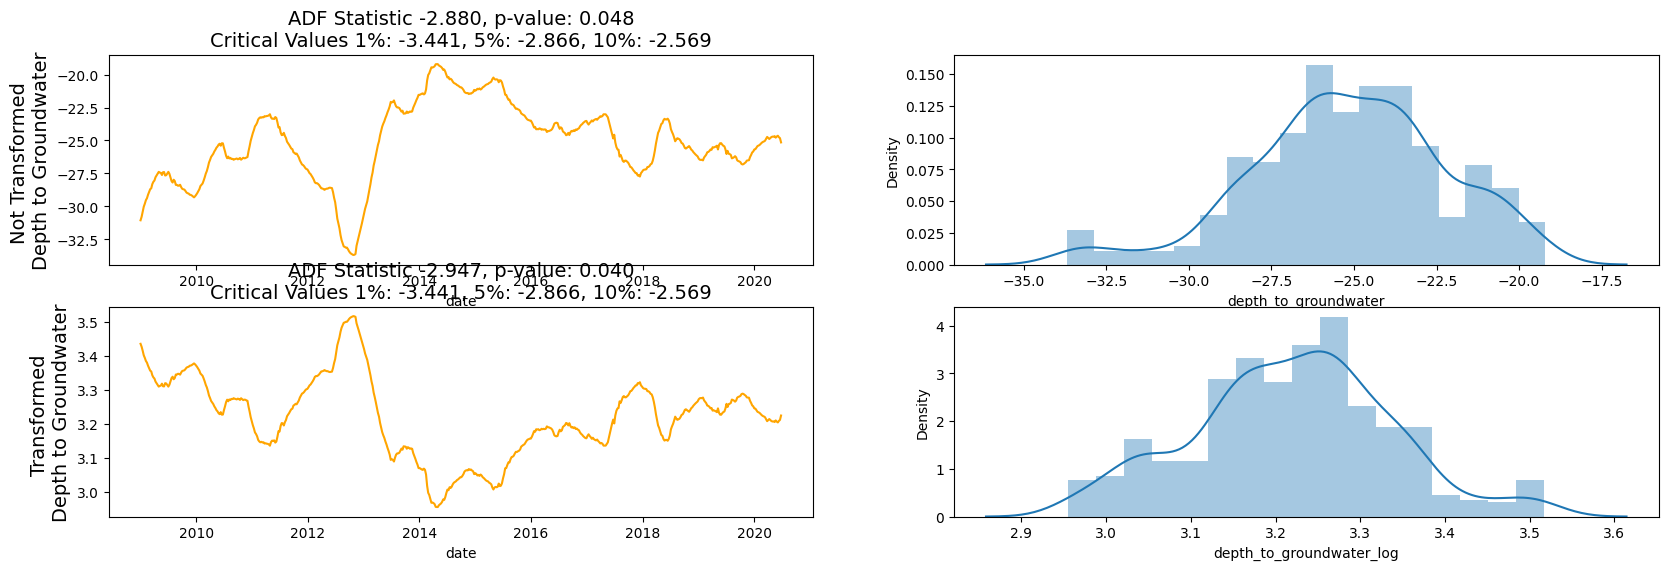

In [28]:
# Log Transform of absolute values
# (Log transform of negative values will return Nan)
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['depth_to_groundwater'], 'Not Transformed \nDepth to Groundwater', ax[0, 0])
sns.distplot(df['depth_to_groundwater'], ax=ax[0, 1])

visualize_adfuller_results(df['depth_to_groundwater_log'], 'Transformed \nDepth to Groundwater', ax[1, 0])
sns.distplot(df['depth_to_groundwater_log'], ax=ax[1, 1])

plt.tight_layout()
plt.show()

Differencing can be done in different orders:
- First order differencing: linear trends with $z_i = y_i - y_{i-1}$
- Second order differencing: quadratic trends with $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
- and so on...

### 2.3.3 Differencing

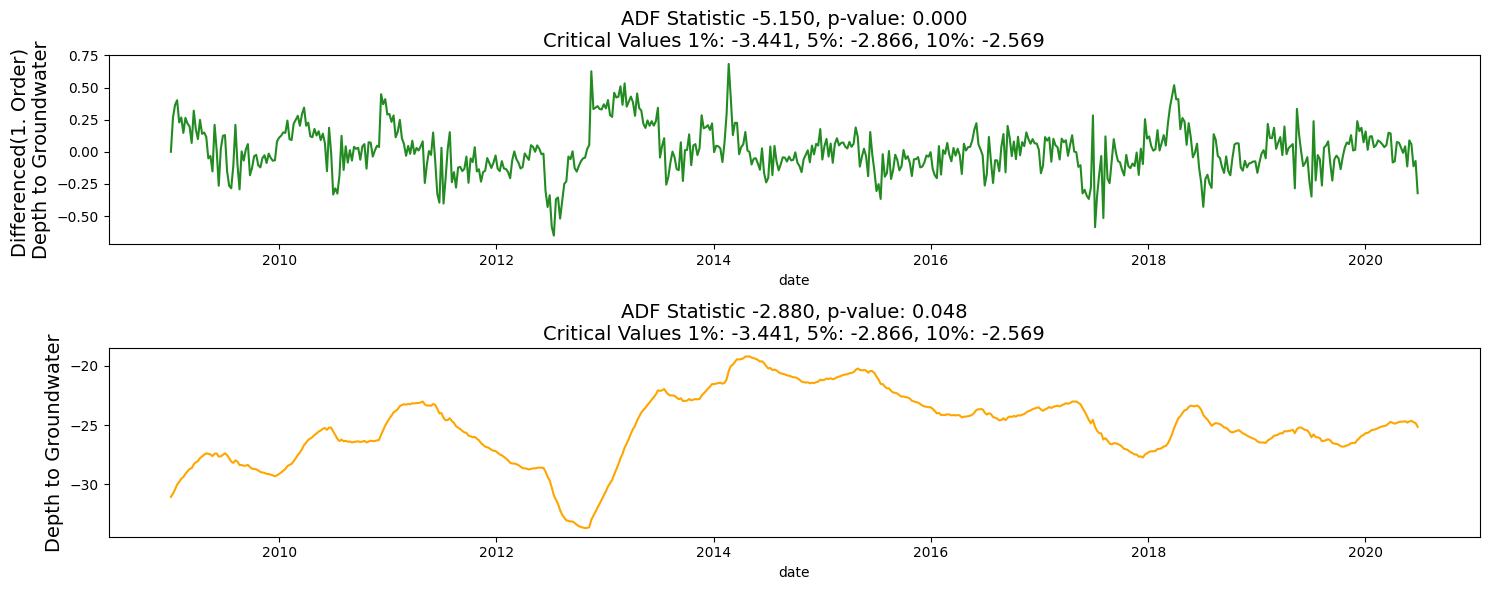

In [35]:
# First Order Differencing
ts_diff = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced(1. Order) \nDepth to Groundwater', ax[0])
visualize_adfuller_results(df['depth_to_groundwater'], 'Depth to Groundwater', ax[1])

plt.tight_layout()
plt.show()